In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')

In [3]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### Explore data


In [9]:
df.shape

(47, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [12]:
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [11]:
df.rename(columns = {'per capita income (US$)' : 'income'}, inplace = True)

### Cleaning Data

In [7]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Linear Relation between 

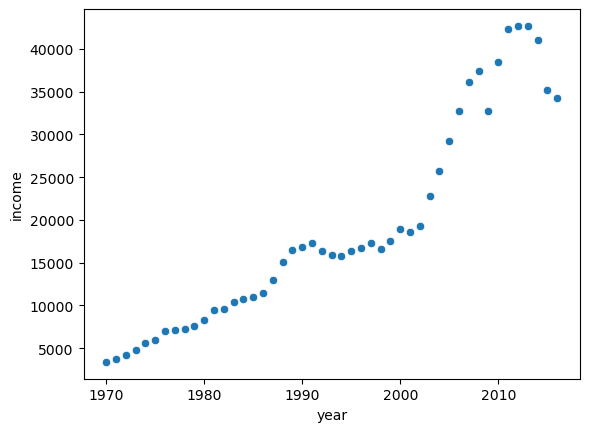

In [15]:
sns.scatterplot( x = df.year, y = df.income)
plt.show()

### Split Dataset into training and testing

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.year, df.income, train_size = .7, random_state = 42)

In [18]:
# Create new axis for x column
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

C:\Users\sohil\AppData\Local\Temp\ipykernel_14260\3530096604.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
C:\Users\sohil\AppData\Local\Temp\ipykernel_14260\3530096604.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]


In [19]:
reg = linear_model.LinearRegression()

In [20]:
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
y_predict = reg.predict(x_test)
y_predict

array([22126.36537343, 31970.12186981, 21306.05233206, 35251.37403527,
       19665.42624933, 29509.18274571,  9821.66975295, 15563.86104251,
        3259.16542203, 20485.7392907 ,  6540.41758749,  2438.85238067,
        4899.79150476, 32790.43491117, 27048.24362162])

### Line Equation

In [22]:
m = reg.coef_

In [23]:
b = reg.intercept_

In [24]:
print('Y = {0} X + {1}'.format(m, b))

Y = [820.31304136] X + -1616038.7782324494


### Model Accuracy

In [25]:
# mean_absolute_error
mean_absolute_error(y_test, y_predict)

3162.9294154442787

In [27]:
# mean_squared_error
mean_squared_error(y_test, y_predict)

14000295.245757796

In [29]:
# R2 score
r2 = r2_score(y_test, y_predict)
r2

0.9005705995581696

In [31]:
print('Accarcy = ', r2* 100)

Accarcy =  90.05705995581697


### Prediction of 2022 income

In [33]:
reg.predict([[2022]])

array([42634.19140755])